In [1]:
df = pd.read_csv("../data/output/df_final2010-2018.csv")

In [2]:
df.head()

,datetime,level,rain,vel_wind,dir_wind
0,2010-01-01 00:00:00,102.0,0.0,0.2,337.5
1,2010-01-01 01:00:00,100.0,0.0,0.7,315.0
2,2010-01-01 02:00:00,86.0,0.0,1.5,247.5
3,2010-01-01 03:00:00,74.0,0.0,1.3,247.5
4,2010-01-01 04:00:00,65.0,0.0,1.3,247.5


In [3]:
df_moon = pd.read_csv("../moon_distance/moon_distances.csv")

In [4]:
df_moon.columns = ["datetime", "dist"]
df_moon.head()

,datetime,dist
0,2010/01/01 00:00:00,353510.208614
1,2010/01/01 01:00:00,353731.458075
2,2010/01/01 02:00:00,354197.433405
3,2010/01/01 03:00:00,354875.253700
4,2010/01/01 04:00:00,355718.662776


In [5]:
#standardize 

df["level_std"] = (df.level - df.level.mean())/df.level.std()
df["level_scaled"] = (df.level -df.level.min())/(df.level.max()-df.level.min())
df["dist"] = df_moon.dist
df["dist_std"] = (df.dist - df.dist.mean())/df.dist.std()
df["dist_scaled"] = (df.dist - df.dist.min())/(df.dist.max()- df.dist.min())
df["ts"] = pd.DatetimeIndex(df.datetime).asi8
df["inv_dist"] = 1/df.dist
df["inv_dist_std"] = (df.inv_dist - df.inv_dist.mean())/df.inv_dist.std()
df["inv_dist_scaled"] = (df.inv_dist - df.inv_dist.min())/(df.inv_dist.max()- df.inv_dist.min())

df["inv_dist_2"] = np.power(df.inv_dist, 2)#1/(np.power(df.dist, 2))
df["inv_dist_2_std"] = (df.inv_dist_2 - df.inv_dist_2.mean())/df.inv_dist_2.std()
df["inv_dist_2_scaled"] = (df.inv_dist_2 - df.inv_dist_2.min())/(df.inv_dist_2.max()- df.inv_dist_2.min())


In [6]:
n = 5000
plt.subplots(figsize=(20,10))
plt.plot(df.ts.values[:n], df.level_std.values[:n], label = "level")
plt.plot(df.ts.values[:n], df.dist_std.values[:n], label = "dist")
plt.plot(df.ts.values[:n], df.inv_dist_std.values[:n], label = "inv dist")
plt.plot(df.ts.values[:n], df.inv_dist_2_std.values[:n], label = "inv quad dist")

plt.legend()
plt.show()

<Figure size 2000x1000 with 1 Axes>

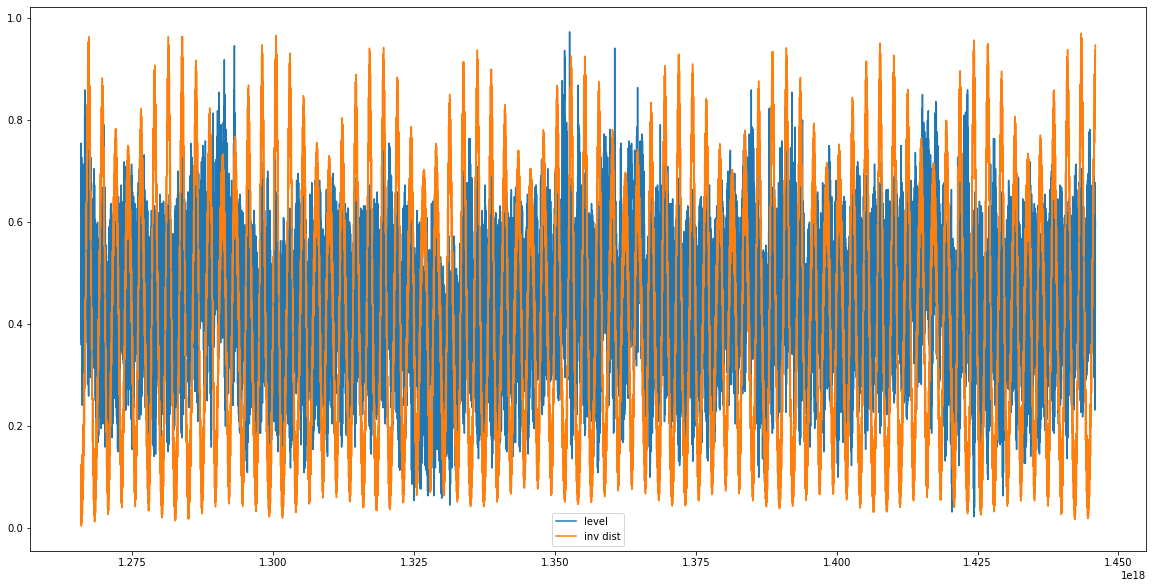

In [7]:
lag = 24
window = 50000
n0 = 1000
n1 = n0 + lag
n = n0 + window
n2 = n1 + window
plt.subplots(figsize=(20,10))
plt.plot(df.ts.values[n0:n], df.level_scaled.values[n0:n], label = "level")
#plt.plot(df.ts.values[n0:n], df.dist_scaled.values[n0:n], label = "dist")
plt.plot(df.ts.values[n0:n], df.inv_dist_scaled.values[n0:n], label = "inv dist")
#plt.plot(df.ts.values[n1:n2], df.inv_dist_2_scaled.values[n1:n2], label = "inv quad dist")

plt.legend()
plt.show()

In [8]:
df.to_csv("df_final_processed.csv")